# Regional Data of Honey Bee Viruses
This notebook analyses the data to explore trends and patterns by region.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../data/bee_virus_data_cleaned.csv')

print("Regions: ", ', '.join(data['Region'].unique()))
print("Number of regions: ", len(data['Region'].unique()))

Regions:  Bács-Kiskun, Baranya, Békés, Borsod-Abaúj-Zemplén, Csongrád, Fejér, Győr-Moson-Sopron, Hajdú-Bihar, Heves, Jász-Nagykun-Szolnok, Komárom-Esztergom, Nógrád, Pest, Somogy, Szabolcs-Szatmár-Bereg, Tolna, Vas, Veszprém, Zala
Number of regions:  19


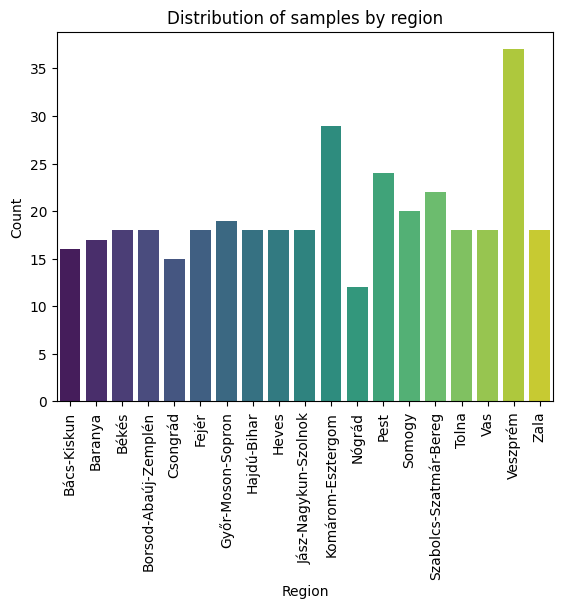

In [11]:
# Plotting the distribution of samples by region
sns.countplot(data=data, x="Region", hue="Region", palette="viridis")
plt.title("Distribution of samples by region")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

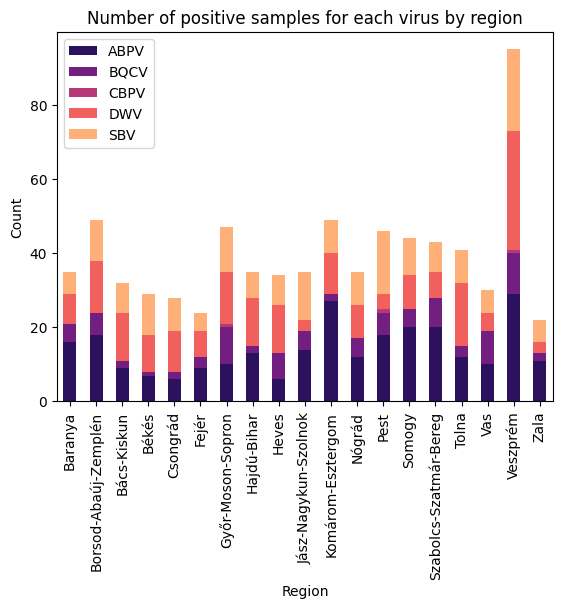

In [12]:
# Plot the number of positive samples for each virus by region
virus_columns = ['ABPV', 'BQCV', 'CBPV', 'DWV', 'SBV']
for virus in virus_columns:
    data[virus] = data[virus].replace({"weak positive": "positive"})
virus_counts = data[virus_columns].apply(pd.Series.value_counts).T["positive"]

positivity_by_region = data.groupby("Region")[virus_columns].apply(lambda x: (x == "positive").sum())

positivity_by_region.plot(kind="bar", stacked=True, color=sns.color_palette("magma", n_colors=5))
plt.title("Number of positive samples for each virus by region")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()